### Setting up Google Colab Environment

In [6]:
!./venv/bin/pip install kaggle pandas seaborn matplotlib


[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [18]:
!kaggle datasets download -d altavish/boston-housing-dataset

738.45s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


/Users/maxim/Documents/work/sigmoid_hw/13_Data_Vizualization/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Dataset URL: https://www.kaggle.com/datasets/altavish/boston-housing-dataset
License(s): CC0-1.0
boston-housing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip boston-housing-dataset.zip

Archive:  boston-housing-dataset.zip
  inflating: HousingData.csv         


### Column Abbreviations

#### Independent Variables

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

B = 1000 * (Bk - 0.63) ^ 2

B / 1000 = (Bk - 0.63) ^ 2

Bk - 0.63 = sqrt(B / 1000)

Bk = 0.63 + sqrt(B / 1000)

LSTAT - % lower status of the population



### Dependent Variable
MEDV - Median value of owner-occupied homes in $1000's

In [2]:
import pandas as pd

df = pd.read_csv("HousingData.csv")
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Initial Correlation Analysis

I want to make a correlation heatmap to have an initial understand of the relationship between different columns.

<Axes: >

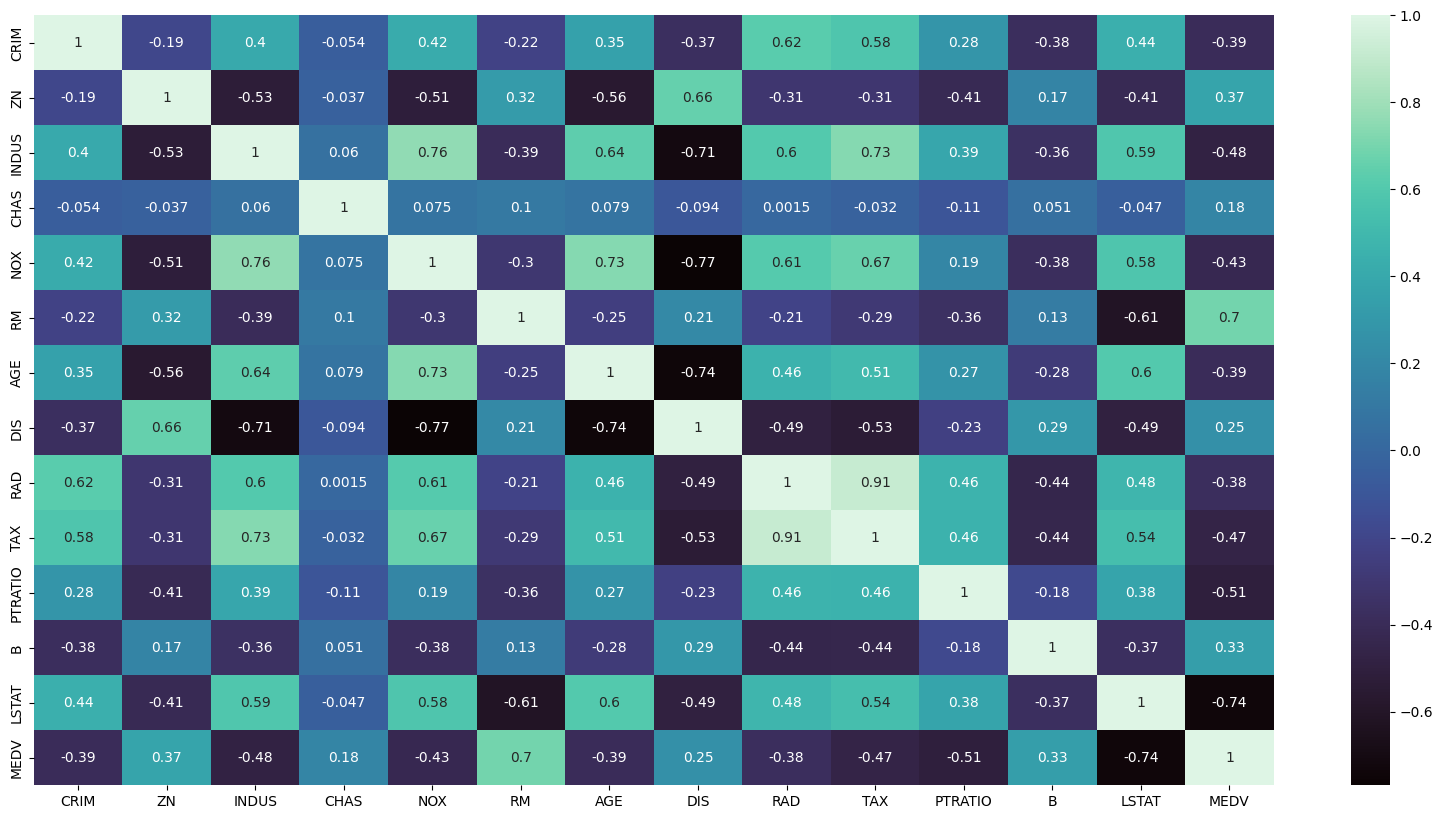

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap = "mako")

Highest correlations:
- RAD ∝ TAX - areas with better access to radial highways tend to be suburban municipalities, and suburban municipalities often fund services through higher property-tax rates

- INDUS ∝ NOX - older areas are closer to factories, railroads, main roads etc., so the surrounding air is more polluted

- NOX ∝ AGE - older urban centers tend to have more roads and more traffic, which leads to higher NOx concentration

- NOX ∝ 1 / DIS - high nitric oxide concentration means small distance to employment centers (due to production pollution, car pollution etc.)

- INDUS ∝ 1 / DIS - the higher the proportion of industrial businesses, the less is the distance to employment centers

- LSTAT ∝ 1 / MEDV - higher portion of lower population status means that the neighbourhood is less desirable to reside in, which leads to simpler housing choices and lower demand, which, in turn, leads to cheaper housing prices

### Histograms

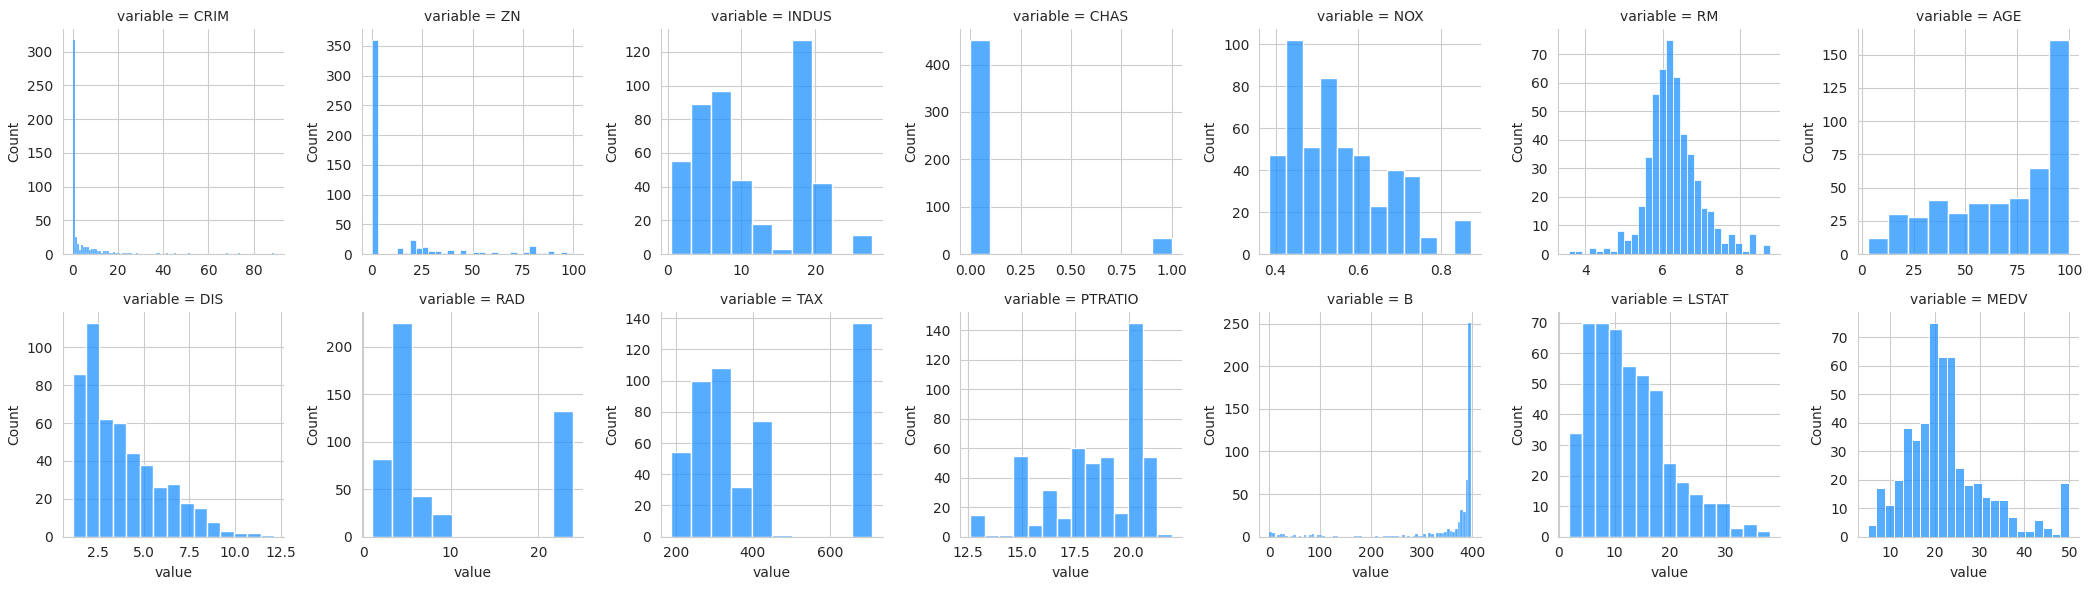

In [4]:
with sns.axes_style('whitegrid'):
  nd = pd.melt(df, value_vars=df.columns)
  n1 = sns.FacetGrid(nd, col='variable', col_wrap=7, sharex=False, sharey=False)
  n1 = n1.map(sns.histplot, 'value', color='#1e90ff')

### KDEs

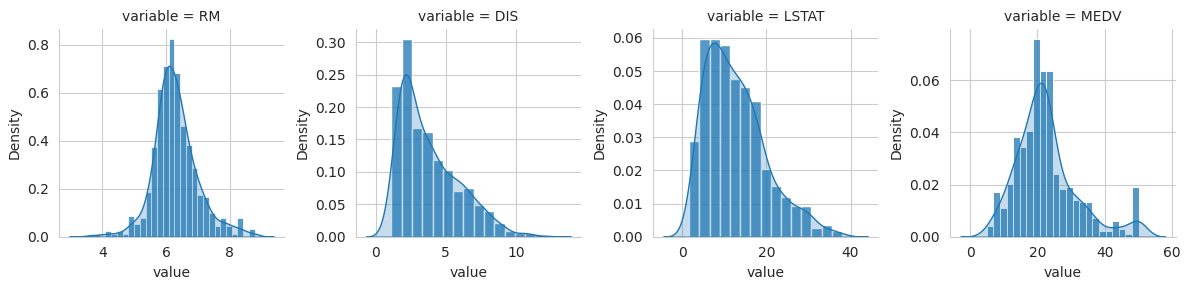

In [5]:
kde_cols = ['RM', 'DIS', 'LSTAT', 'MEDV']

with sns.axes_style('whitegrid'):
  nd = pd.melt(df, value_vars=kde_cols)
  n1 = sns.FacetGrid(nd, col='variable', col_wrap=4, sharex=False, sharey=False)

  n1.map(
      sns.histplot,
      'value',
      stat='density',
  )

  n1.map(
      sns.kdeplot,
      'value',
      fill=True
  )

#### Direct proportionality between RM and MEDV

<Axes: xlabel='RM', ylabel='MEDV'>

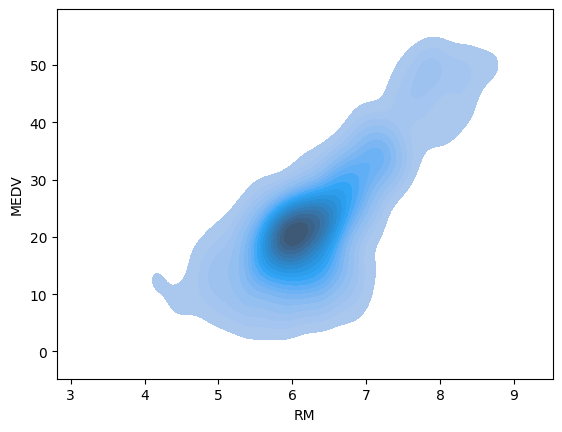

In [9]:
sns.kdeplot(data=df, x="RM", y="MEDV", fill=True, levels=20, thresh=0.05)

#### Inverse Proportionality between LSTAT and MEDV

<Axes: xlabel='LSTAT', ylabel='MEDV'>

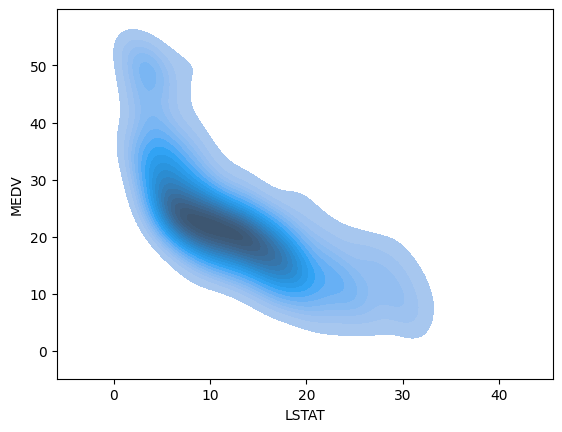

In [10]:
sns.kdeplot(data=df, x="LSTAT", y="MEDV", fill=True, levels=20, thresh=0.05)

### Box Plot

#### High Outlier Rate

Observations:
- Very high criminality rate (CRIM) and high area lots (ZN) are rarely encountered
- Median number of rooms (RM) is ~6±1 rooms, lower than 5 and more than 8 is considered rare
- Very low pupil-to-teacher ratios (PTRATIO) is very rarely seen

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


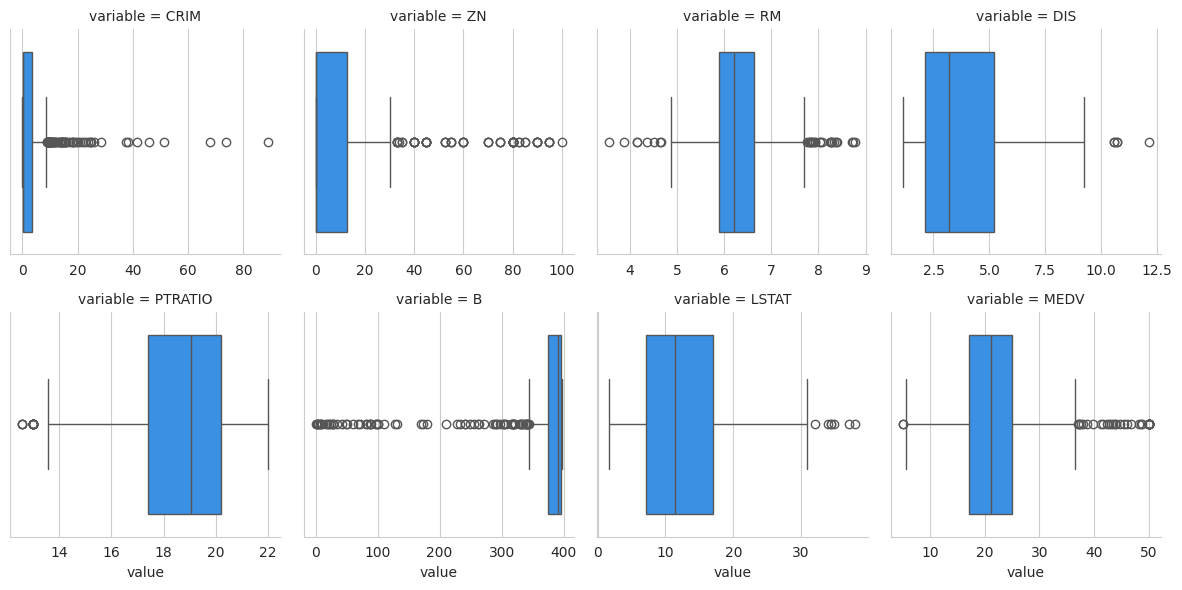

In [ ]:
high_outlier_cols = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

with sns.axes_style('whitegrid'):
  nd = pd.melt(df, value_vars=high_outlier_cols)
  n1 = sns.FacetGrid(nd, col='variable', col_wrap=len(high_outlier_cols) // 2, sharex=False, sharey=False)

  n1.map(
      sns.boxplot,
      'value',
      data=df[high_outlier_cols],
      orient="h",
      color = "#1e90ff"
  )

#### Low Outlier Rate

['INDUS', 'NOX', 'AGE', 'RAD', 'TAX']


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


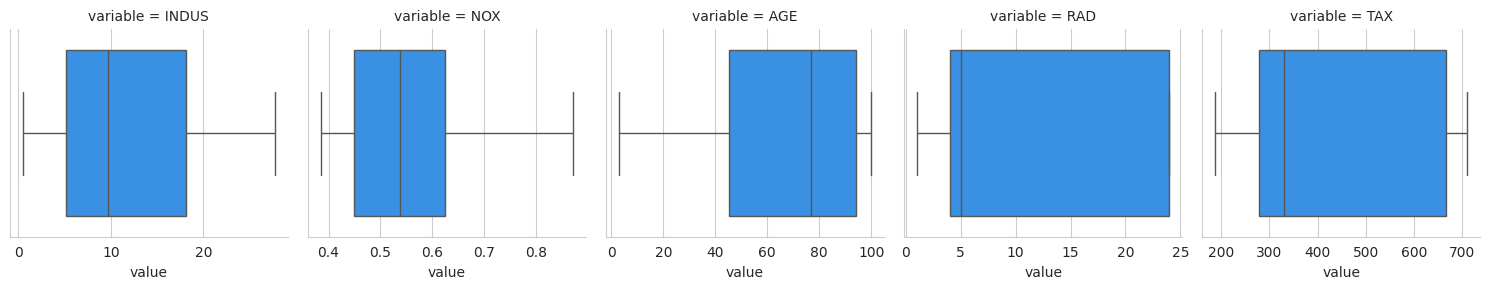

In [ ]:
ignore_cols = ['CHAS']
low_outliers_cols = [col for col in df.columns
                     if col not in high_outlier_cols and col not in ignore_cols]

with sns.axes_style('whitegrid'):
  nd = pd.melt(df, value_vars=low_outliers_cols)
  n2 = sns.FacetGrid(nd, col='variable', col_wrap=len(low_outliers_cols), sharex=False, sharey=False)

  n2.map(
      sns.boxplot,
      'value',
      data=df[low_outliers_cols],
      orient="h",
      color = "#1e90ff"
  )

### Violinplot

<Axes: ylabel='AGE'>

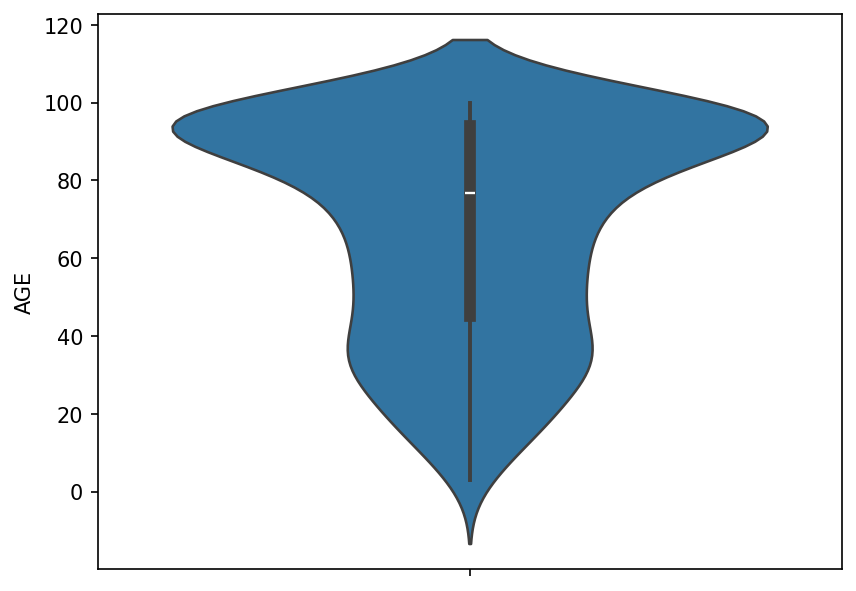

In [7]:
plt.figure(dpi=150)
sns.violinplot(y="AGE", data=df)

<Axes: ylabel='MEDV'>

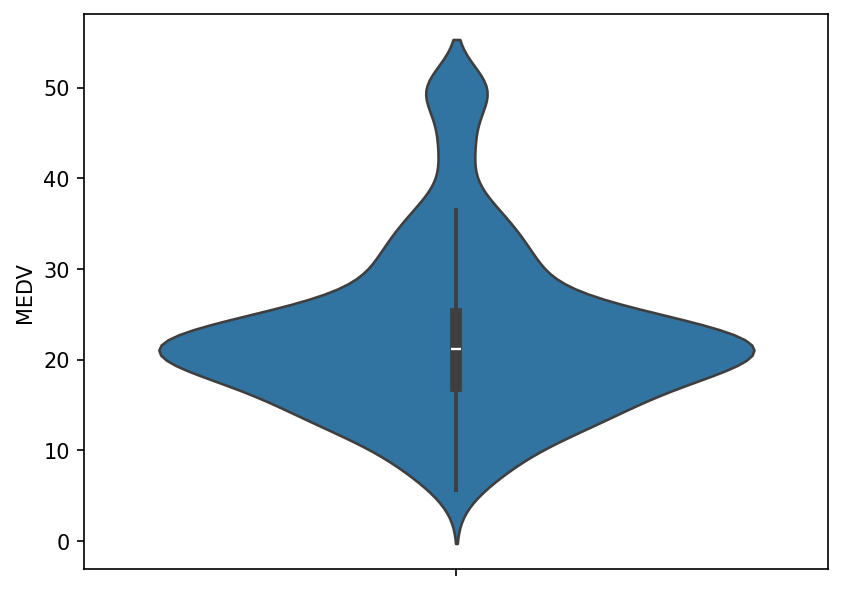

In [8]:
plt.figure(dpi=150)
sns.violinplot(y="MEDV", data=df)

### lmplot

Showing columns with high correlation rate to target MEDV column

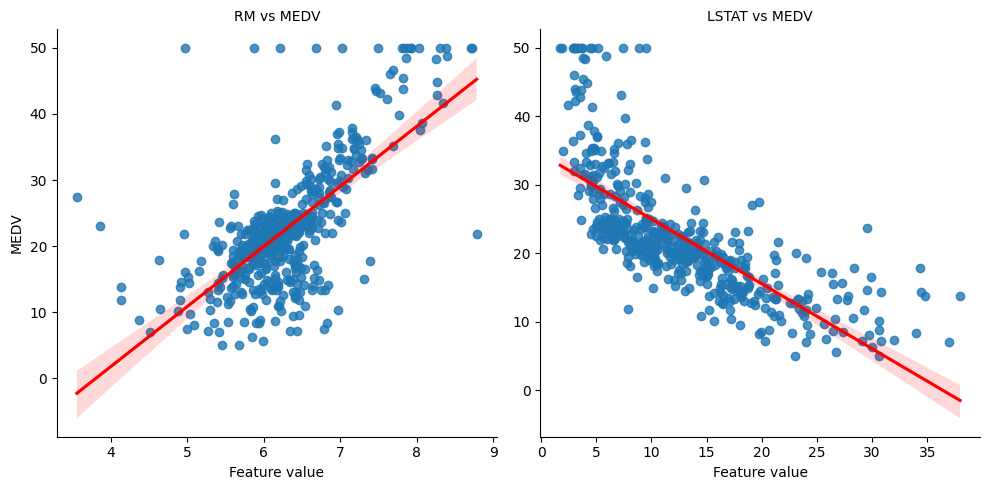

In [22]:
high_proportionality = ["RM", "LSTAT"]

# Long format: one column with feature name, one with its value, keep MEDV as target
long_df = df.melt(
    id_vars=["MEDV"],
    value_vars=high_proportionality,
    var_name="variable",
    value_name="value",
)

g = sns.lmplot(
    data=long_df,
    x="value",
    y="MEDV",
    col="variable",
    col_wrap=len(high_proportionality),
    line_kws={"color": "red"},
    facet_kws={"sharex": False, "sharey": False}
)

g.set_axis_labels("Feature value", "MEDV")
g.set_titles("{col_name} vs MEDV")
plt.tight_layout()